# Subsurface Salinity Time-Series Analysis

Info: Net primary production is the rate at which organic matter is produced through photosynthesis by primary producers, such as phytoplankton. The units of the column are milligrams of carbon per square meter per day (mg-C/m2/day). This represents the amount of carbon fixed by photosynthesis in a unit area of the ocean over a 24-hour period.

Insight: The values in this column are likely to vary depending on the amount of chlorophyll-a present in the water, as chlorophyll-a is often used as a proxy for phytoplankton biomass. Higher chlorophyll-a concentrations may indicate higher levels of phytoplankton biomass, and thus higher rates of NPP.

In [2]:
import pandas as pd

#### Reading & Cleaning datasets

In [6]:
# Creating a dictionary for all geo-points with their salinity data
geopoint = {'A': pd.read_csv('../Nauplius data (raw)/point A/dataPSAL_HEN4-z0005.csv'),
            'B': pd.read_csv('../Nauplius data (raw)/point B/dataPSAL_HEN4-z0005.csv'),
            'C': pd.read_csv('../Nauplius data (raw)/point C/dataPSAL_HEN4-z0005.csv')
           }
# Cleaning all datasets
for df in geopoint.values():
    # Dropping empty unnamed NaN col
    df.drop(columns=df.columns[-1], inplace=True)
    # Renaming the salinity col
    df.rename(columns={'PSAL= Hadley-EN4 Salinity () at 5 m': 'Salinity'}, inplace=True)

# Display 2 random datasets
display(geopoint['A'], geopoint['C'])

,DATE-YMD,Salinity
0,1950-01-15,35.991
1,1950-02-15,35.981
2,1950-03-15,35.945
3,1950-04-15,35.950
4,1950-05-15,35.952
...,...,...
859,2021-08-15,36.106
860,2021-09-15,36.155
861,2021-10-15,36.182
862,2021-11-15,36.106


,DATE-YMD,Salinity
0,1950-01-15,35.965
1,1950-02-15,35.956
2,1950-03-15,35.920
3,1950-04-15,35.920
4,1950-05-15,35.924
...,...,...
859,2021-08-15,36.113
860,2021-09-15,36.155
861,2021-10-15,36.173
862,2021-11-15,36.095


#### Comparison of salinity of all geopoints 

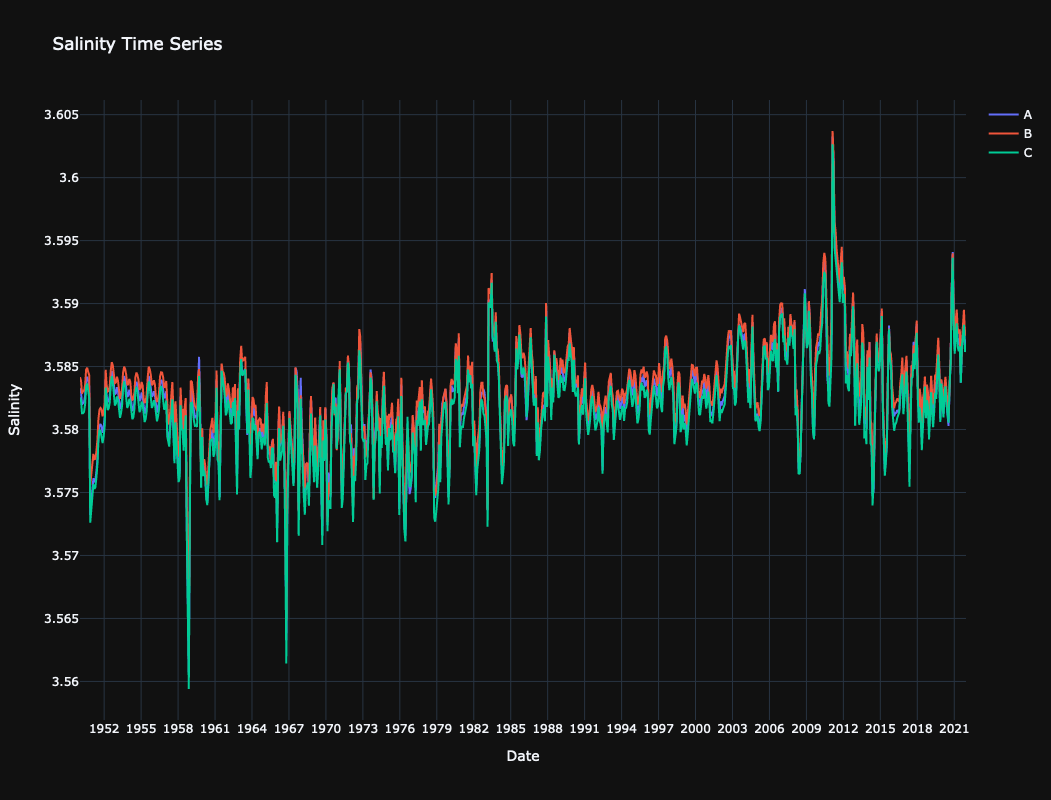

In [16]:
import plotly.graph_objs as go
import math

# Create empty traces list and loop through each geopoint
traces = []
for point in geopoint:
    # access dataframe
    df = geopoint[point]
    # create trace for each dataset
    trace = go.Scatter(x=df['DATE-YMD'], y=df['Salinity'].apply(math.log), mode='lines', name=point)
    # append trace to traces list
    traces.append(trace)

# create layout for the plot
layout = go.Layout(title=f'Salinity Time Series',
                   xaxis=dict(title='Date', dtick='M36'),
                   yaxis=dict(title='Salinity'),
                   height = 800, width=1200,
                   template='plotly_dark')
# create figure object and plot the traces
fig = go.Figure(data=traces, layout=layout)
fig.show()